In [1]:
import pandas as pd
import numpy as np

### Load Data

In [2]:
from pycaret.datasets import get_data

In [3]:
data = get_data('juice')

,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [5]:
data.shape

(1070, 19)

## Set Target

In [6]:
from pycaret.classification import *
exp1 = setup(data, target = 'Purchase')

,Description,Value
0,session_id,710
1,Target,Purchase
2,Target Type,Binary
3,Label Encoded,"CH: 0, MM: 1"
4,Original Data,"(1070, 19)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


## Get Models

In [24]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [7]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8330,0.9009,0.7728,0.8028,0.7863,0.6494,0.6510,0.0060
lr,Logistic Regression,0.8303,0.9009,0.7595,0.8060,0.7806,0.6427,0.6449,0.5330
ridge,Ridge Classifier,0.8303,0.0000,0.7729,0.7977,0.7827,0.6438,0.6465,0.0060
gbc,Gradient Boosting Classifier,0.8290,0.9064,0.7929,0.7834,0.7872,0.6444,0.6454,0.0420
ada,Ada Boost Classifier,0.8263,0.8869,0.7929,0.7777,0.7842,0.6389,0.6402,0.0300
lightgbm,Light Gradient Boosting Machine,0.8155,0.8913,0.7730,0.7679,0.7696,0.6160,0.6168,0.0220
rf,Random Forest Classifier,0.8089,0.8824,0.7598,0.7613,0.7595,0.6012,0.6023,0.1970
dt,Decision Tree Classifier,0.7942,0.7905,0.7262,0.7521,0.7369,0.5684,0.5706,0.0060
et,Extra Trees Classifier,0.7728,0.8473,0.7228,0.7146,0.7177,0.5277,0.5287,0.1810
nb,Naive Bayes,0.7702,0.8397,0.7895,0.6906,0.7340,0.5341,0.5411,0.0100


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [32]:
best_model = compare_models(sort='AUC')
print(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8290,0.9064,0.7929,0.7834,0.7872,0.6444,0.6454,0.0350
lr,Logistic Regression,0.8303,0.9009,0.7595,0.8060,0.7806,0.6427,0.6449,0.5120
lda,Linear Discriminant Analysis,0.8330,0.9009,0.7728,0.8028,0.7863,0.6494,0.6510,0.0050
lightgbm,Light Gradient Boosting Machine,0.8155,0.8913,0.7730,0.7679,0.7696,0.6160,0.6168,0.0210
ada,Ada Boost Classifier,0.8263,0.8869,0.7929,0.7777,0.7842,0.6389,0.6402,0.0300
rf,Random Forest Classifier,0.8089,0.8824,0.7598,0.7613,0.7595,0.6012,0.6023,0.2000
et,Extra Trees Classifier,0.7728,0.8473,0.7228,0.7146,0.7177,0.5277,0.5287,0.1810
nb,Naive Bayes,0.7702,0.8397,0.7895,0.6906,0.7340,0.5341,0.5411,0.0050
dt,Decision Tree Classifier,0.7942,0.7905,0.7262,0.7521,0.7369,0.5684,0.5706,0.0050
knn,K Neighbors Classifier,0.7152,0.7783,0.6093,0.6593,0.6293,0.3996,0.4034,0.0490


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=710, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [26]:
  dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7600,0.7633,0.7000,0.7000,0.7000,0.5000,0.5000
1,0.7733,0.7519,0.6667,0.7407,0.7018,0.5198,0.5217
2,0.8267,0.8278,0.8333,0.7576,0.7937,0.6448,0.6470
3,0.8400,0.8530,0.8333,0.7812,0.8065,0.6703,0.6713
4,0.7333,0.7370,0.7000,0.6562,0.6774,0.4505,0.4512
5,0.7867,0.7956,0.6667,0.7692,0.7143,0.5455,0.5490
6,0.7867,0.7722,0.7000,0.7500,0.7241,0.5506,0.5514
7,0.7867,0.7722,0.7000,0.7500,0.7241,0.5506,0.5514
8,0.7703,0.7561,0.6000,0.7826,0.6792,0.5051,0.5159
9,0.8784,0.8755,0.8621,0.8333,0.8475,0.7464,0.7467


In [27]:
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=710, splitter='best')


In [28]:
dt.feature_importances_

array([0.10965996, 0.        , 0.02380143, 0.60405703, 0.01637327,
       0.02104431, 0.11558528, 0.00737292, 0.00477154, 0.01720115,
       0.00604292, 0.01345183, 0.01681761, 0.01856839, 0.00771141,
       0.00541838, 0.01212257])

In [29]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8267,0.8967,0.8333,0.7576,0.7937,0.6448,0.6470
1,0.7733,0.8744,0.7000,0.7241,0.7119,0.5251,0.5253
2,0.8667,0.9259,0.8667,0.8125,0.8387,0.7253,0.7264
3,0.8400,0.9081,0.8333,0.7812,0.8065,0.6703,0.6713
4,0.8133,0.8844,0.8333,0.7353,0.7812,0.6196,0.6233
5,0.8533,0.9556,0.8000,0.8276,0.8136,0.6927,0.6930
6,0.7600,0.8281,0.6667,0.7143,0.6897,0.4944,0.4952
7,0.8133,0.9044,0.7667,0.7667,0.7667,0.6111,0.6111
8,0.8378,0.9216,0.7667,0.8214,0.7931,0.6600,0.6611
9,0.9054,0.9648,0.8621,0.8929,0.8772,0.8003,0.8006


In [30]:
gbc

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=710, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Plot Model Features

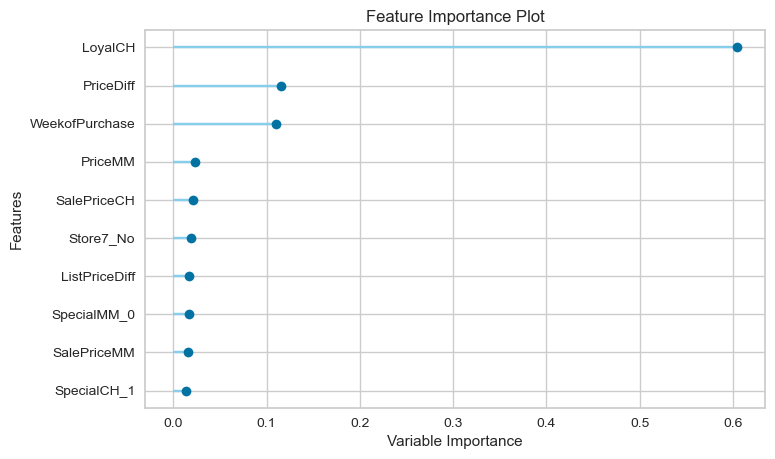

In [34]:
plot_model(dt, plot = 'feature')

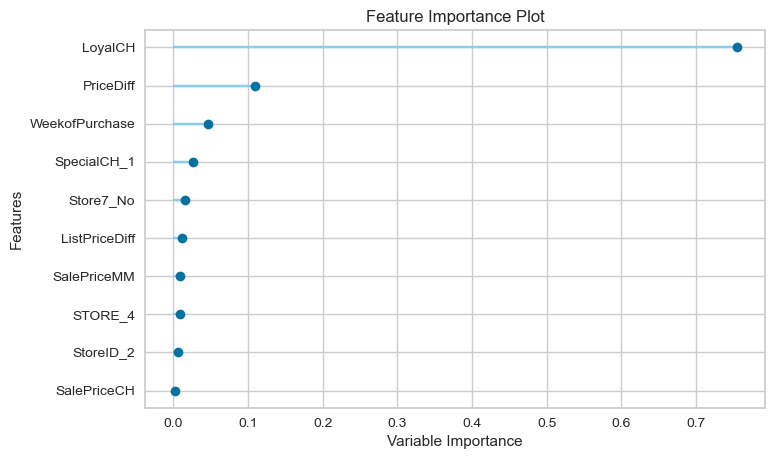

In [35]:
plot_model(gbc, plot = 'feature')

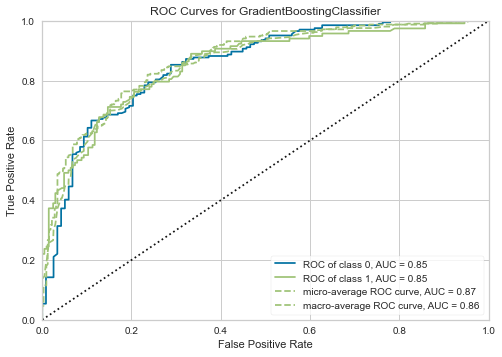

In [38]:
plot_model(gbc, plot = 'auc')

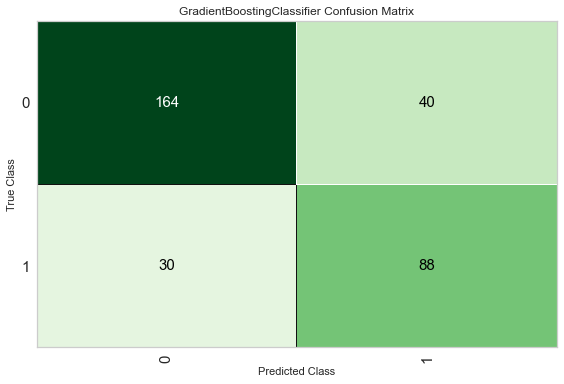

In [39]:
plot_model(gbc, plot = 'confusion_matrix')

## Tune Model

In [1]:
tuned_dt = tune_model('dt')

NameError: name 'tune_model' is not defined